In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!kaggle datasets download -d dorianvoydie/defi-ia-trainset
!rm dataapp.csv
!rm datatest.csv
!rm Trainset.csv
!unzip defi-ia-trainset.zip
!rm defi-ia-trainset.zip
!mv Trainset.csv dataset.csv

 79%|█████████████████████████████▉        | 18.0M/22.8M [00:00<00:00, 49.0MB/s]
100%|██████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 44.3MB/s]
rm: Trainset.csv: No such file or directory
Archive:  defi-ia-trainset.zip
  inflating: Trainset.csv            


In [3]:
df = pd.read_csv("dataset.csv",index_col="Id")
display(df.head())
print(df.shape)

,dd,hu,td,t,ff,precip,month,number_sta,Ground_truth,ws,...,r_3D_arpege,ws_3D_arpege,p3031_3D_arpege,u_3D_arpege,v_3D_arpege,w_3D_arpege,z_3D_arpege,lat,lon,height_sta
Id,,,,,,,,,,,,,,,,,,,,,
14066001_0,146.500000,88.591667,278.514583,280.333750,3.913750,0.2,1,14066001,3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.334,-0.431,2.0
14066001_1,205.625000,82.300000,279.997500,282.936667,8.041250,3.4,1,14066001,11.7,10.600895,...,82.191787,11.340173,198.634464,3.425157,9.258523,0.359990,173.634967,49.334,-0.431,2.0
14066001_10,209.541667,86.750000,277.497917,279.557917,5.408750,6.0,1,14066001,1.0,8.646451,...,85.268490,14.430385,225.078585,9.116250,9.006081,0.313872,2982.975414,49.334,-0.431,2.0
14066001_100,134.958333,76.408333,277.944583,282.112917,4.296250,11.6,4,14066001,5.6,7.242371,...,78.088846,5.896205,132.943446,-4.325236,3.554619,0.135928,413.403895,49.334,-0.431,2.0
14066001_101,167.208333,88.745833,281.003333,282.805000,1.754583,5.6,4,14066001,3.2,2.840101,...,86.179709,2.628501,159.980699,-0.801739,1.275232,0.059505,423.532571,49.334,-0.431,2.0


(162107, 29)


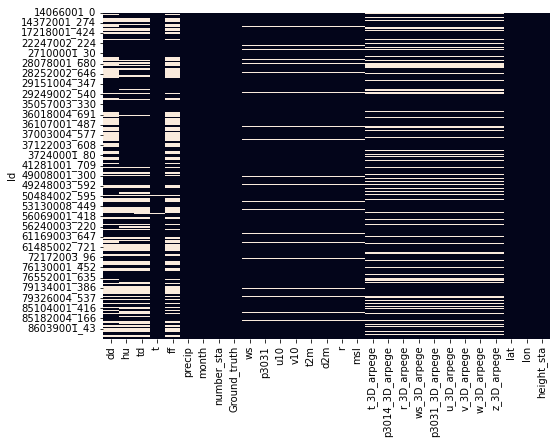

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [5]:
stations = pd.DataFrame(columns=["number_sta","NaNs"])
for station in df["number_sta"].unique():
    max_nan = max((df[df["number_sta"]==station].isna().sum()/df[df["number_sta"]==station].shape[0]*100))
    df2 = {"number_sta":station,"NaNs":max_nan,"Days":df[df["number_sta"]==station].shape[0]}
    stations = stations.append(df2,ignore_index=True)
display(stations.head(5).sort_values(by=["Days"],ascending=False))

,number_sta,NaNs,Days
0,14066001.0,21.685083,724.0
4,14296001.0,100.000000,722.0
3,14216001.0,21.636616,721.0
1,14126001.0,100.000000,686.0
2,14137001.0,21.652893,605.0


In [6]:
# station_0 = 14066001
# stations = [56081003,14577003,29249002,29278001,29041003]
# df_complet = df[df["number_sta"]==station_0].drop("number_sta",axis=1)
# for station in stations:
#     df_temp = df[df["number_sta"]==station].drop(["Ground_truth","lat","lon","height_sta","number_sta"],axis=1)
#     print(df_temp.shape)
#     pd.concat([df_complet,df_temp],axis=1,join="inner")
# display(df_complet.head())
# print(df_complet.shape)

station = 14066001
df = df[df["number_sta"]==station]
df.head()

,dd,hu,td,t,ff,precip,month,number_sta,Ground_truth,ws,...,r_3D_arpege,ws_3D_arpege,p3031_3D_arpege,u_3D_arpege,v_3D_arpege,w_3D_arpege,z_3D_arpege,lat,lon,height_sta
Id,,,,,,,,,,,,,,,,,,,,,
14066001_0,146.500000,88.591667,278.514583,280.333750,3.913750,0.2,1,14066001,3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.334,-0.431,2.0
14066001_1,205.625000,82.300000,279.997500,282.936667,8.041250,3.4,1,14066001,11.7,10.600895,...,82.191787,11.340173,198.634464,3.425157,9.258523,0.359990,173.634967,49.334,-0.431,2.0
14066001_10,209.541667,86.750000,277.497917,279.557917,5.408750,6.0,1,14066001,1.0,8.646451,...,85.268490,14.430385,225.078585,9.116250,9.006081,0.313872,2982.975414,49.334,-0.431,2.0
14066001_100,134.958333,76.408333,277.944583,282.112917,4.296250,11.6,4,14066001,5.6,7.242371,...,78.088846,5.896205,132.943446,-4.325236,3.554619,0.135928,413.403895,49.334,-0.431,2.0
14066001_101,167.208333,88.745833,281.003333,282.805000,1.754583,5.6,4,14066001,3.2,2.840101,...,86.179709,2.628501,159.980699,-0.801739,1.275232,0.059505,423.532571,49.334,-0.431,2.0


# Mise en ordre chronologique

In [7]:
days = []
day_multiindex = df.index.str.split("_", n = 2, expand = True)
for tuple in day_multiindex:
    days.append(int(tuple[1]))
    

In [8]:
df["day"] = days
df = df.sort_values(["day"])
df = df.drop("day",axis=1)
df.head()

,dd,hu,td,t,ff,precip,month,number_sta,Ground_truth,ws,...,r_3D_arpege,ws_3D_arpege,p3031_3D_arpege,u_3D_arpege,v_3D_arpege,w_3D_arpege,z_3D_arpege,lat,lon,height_sta
Id,,,,,,,,,,,,,,,,,,,,,
14066001_0,146.500000,88.591667,278.514583,280.333750,3.913750,0.2,1,14066001,3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.334,-0.431,2.0
14066001_1,205.625000,82.300000,279.997500,282.936667,8.041250,3.4,1,14066001,11.7,10.600895,...,82.191787,11.340173,198.634464,3.425157,9.258523,0.359990,173.634967,49.334,-0.431,2.0
14066001_2,195.250000,86.604167,278.997500,281.101667,5.430417,11.7,1,14066001,0.6,9.067070,...,84.435454,9.309551,195.656322,1.880107,8.231149,0.285414,-82.023696,49.334,-0.431,2.0
14066001_3,212.666667,80.645833,277.900833,281.055000,6.715417,0.6,1,14066001,0.4,8.396412,...,81.425458,17.566844,231.737793,13.753238,10.759828,0.471057,3164.069164,49.334,-0.431,2.0
14066001_4,205.041667,82.750000,278.484167,281.255833,5.957083,0.4,1,14066001,3.0,7.253938,...,85.555492,14.904848,228.362678,10.605956,9.951973,0.424006,3100.887868,49.334,-0.431,2.0


# Imputation

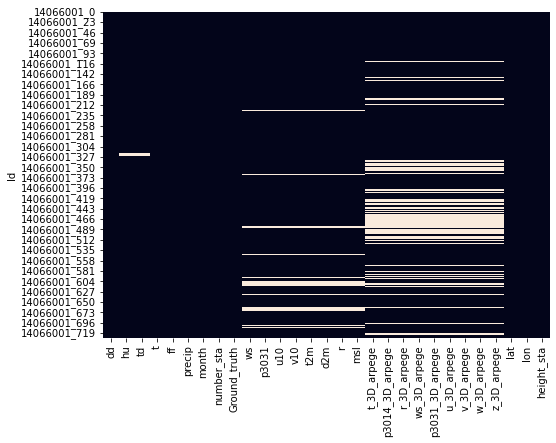

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [10]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df.head()

,dd,hu,td,t,ff,precip,month,number_sta,Ground_truth,ws,...,r_3D_arpege,ws_3D_arpege,p3031_3D_arpege,u_3D_arpege,v_3D_arpege,w_3D_arpege,z_3D_arpege,lat,lon,height_sta
Id,,,,,,,,,,,,,,,,,,,,,
14066001_0,146.500000,88.591667,278.514583,280.333750,3.913750,0.2,1,14066001,3.4,10.600895,...,82.191787,11.340173,198.634464,3.425157,9.258523,0.359990,173.634967,49.334,-0.431,2.0
14066001_1,205.625000,82.300000,279.997500,282.936667,8.041250,3.4,1,14066001,11.7,10.600895,...,82.191787,11.340173,198.634464,3.425157,9.258523,0.359990,173.634967,49.334,-0.431,2.0
14066001_2,195.250000,86.604167,278.997500,281.101667,5.430417,11.7,1,14066001,0.6,9.067070,...,84.435454,9.309551,195.656322,1.880107,8.231149,0.285414,-82.023696,49.334,-0.431,2.0
14066001_3,212.666667,80.645833,277.900833,281.055000,6.715417,0.6,1,14066001,0.4,8.396412,...,81.425458,17.566844,231.737793,13.753238,10.759828,0.471057,3164.069164,49.334,-0.431,2.0
14066001_4,205.041667,82.750000,278.484167,281.255833,5.957083,0.4,1,14066001,3.0,7.253938,...,85.555492,14.904848,228.362678,10.605956,9.951973,0.424006,3100.887868,49.334,-0.431,2.0


In [11]:
print(df.shape)

(724, 29)


# Train test split

In [12]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.25, shuffle=True)

In [13]:
trainset.to_csv("dataapp.csv")
testset.to_csv("datatest.csv")